<a href="https://colab.research.google.com/github/nccreang/BGlib/blob/master/Linear_trKPFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configure the notebook

In [1]:
%%capture
import sys
!{sys.executable} -m pip install -U --no-deps BGlib
!git clone https://github.com/nccreang/BGlib


In [1]:
from __future__ import division, print_function, absolute_import

import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import h5py
import sidpy
import pyUSID as usid
from BGlib.BGlib import trKPFM as trlib
from scipy import signal as si
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable


/usr/local/lib/python3.6/dist-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Make the data USID compatible

In [2]:
input_file_path = '/content/MSG0003C_top_high_bias0001.ibw'
if input_file_path.endswith('.ibw'):
  data_path = input_file_path
  tl = trlib.translators.IgorIBWTranslator()
  h5_path = tl.translate(input_file_path)
  h5_file = h5py.File(h5_path)
  h5_main = usid.hdf_utils.find_dataset(h5_file,'Raw_Data')
  

/usr/local/lib/python3.6/dist-packages/pyUSID/io/dtype_utils.py:312: FutureWarning: pyUSID.io.dtype_utils.validate_single_string_arg has been moved to sidpy.base.string_utils.validate_single_string_arg. This copy in pyUSID willbe removed in future release. Please update your import statements
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyUSID/io/hdf_utils/simple.py:1135: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
/usr/local/lib/python3.6/dist-packages/pyUSID/io/hdf_utils/simple.py:1192: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'
/

In [3]:
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [3]:
test = trlib.analysis.LinearKPFM(h5_main,0.5,75,0.2)

In [4]:
test.unpack_data()

In [5]:
test.compute_voltage_averages()

(<Figure size 1080x720 with 27 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa53bfb99e8>,
       dtype=object))

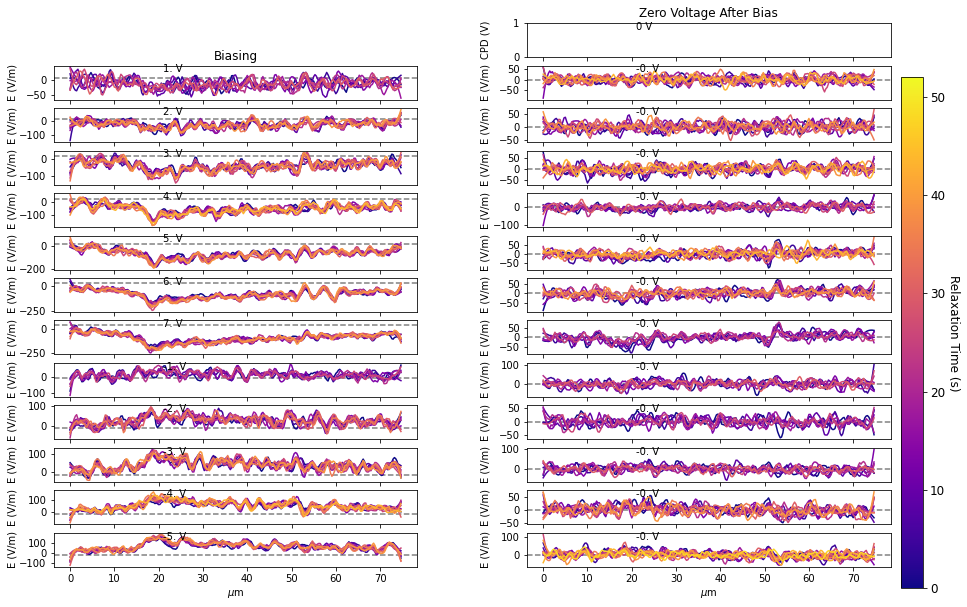

In [6]:
test.plot_CPD_voltages(method='Efield')